In [1]:
# import
from matplotlib import pyplot as plt
from mag_phase_extracter import mag_phase_extracter
from scipy.ndimage import gaussian_filter1d
import numpy as np
%matplotlib widget

In [2]:
mike_version = 6
frequencies = []
freq = 0.1
for i in range(1,10):
    frequencies.append(round(freq,1))
    freq += 0.1
freq = 1
for i in range(1,21):
    frequencies.append(int(freq))
    freq += 1

In [3]:
mags = []
phases = []

for freq in frequencies:
    [mag,phase] = mag_phase_extracter(mike_version,freq)
    mags.append(mag)
    phases.append(phase)

In [4]:
# smooth the curves in order to create nicer plot
mag_smooth = gaussian_filter1d(mags, sigma=1)
phase_smooth = gaussian_filter1d(phases, sigma=1)

# clean phase measurement errors for high frequencies (phase can get larger again in measurements due to false peak measurements, which is physically not possible)
for i in range(0,np.size(phases)):
    if frequencies[i] >= 10:
        if phase_smooth[i] > phase_smooth[i-1]:
            phase_smooth[i] = phase_smooth[i-1]

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
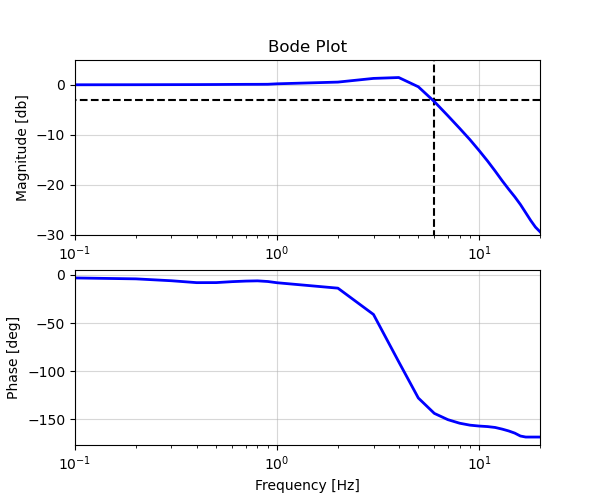

In [5]:
# plotting
plt.clf()
plt.close('all')
fig, ax = plt.subplots(2,1)
fig.set_size_inches([6,5])

ax[0].hlines(-3,0,20,color='black',linestyle='dashed')

ax[0].plot(frequencies, mag_smooth, color='b', linewidth=2)
ax[0].set_ylabel("Magnitude [db]")
ax[0].semilogx()
ax[0].grid(alpha=0.5)
ax[0].set_xlim([0.1,20])
ax[0].set_title('Bode Plot')
ax[0].set_ylim([-30,5])

ax[1].plot(frequencies, phase_smooth, color='b', linewidth=2)
ax[1].set_xlabel("Frequency [Hz]")
ax[1].set_ylabel("Phase [deg]")
ax[1].semilogx()
ax[1].grid(alpha=0.5)
ax[1].set_xlim([0.1,20])

# create a vertical line where the magnitude reaches -3dB; has to be read by eye from the plot; vlines(x,y_min,y_max)
ax[0].vlines(6,-35,5,colors='black',linestyle='dashed')

plt.savefig("Mike6_Bode_Plot.pdf")

plt.show()